## King County Housing Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import seaborn as sns

In [3]:
kc_df = pd.read_csv('kc_housing_data_for_feat_engineering_lab.csv',index_col='id')

In [4]:
kc_df.head(100)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,year_sold,since_sold,price_log
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,62,2014,3,12.309982
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,66,2014,3,13.195614
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,84,2015,2,12.100712
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,52,2014,3,13.311329
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,30,2015,2,13.142166
7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,3,...,0,98053,47.6561,-122.005,4760,101930,16,2014,3,14.018451
1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,3,...,0,98003,47.3097,-122.327,2238,6819,22,2014,3,12.458775
2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,3,...,0,98198,47.4095,-122.315,1650,9711,54,2015,2,12.583995
2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,3,...,0,98146,47.5123,-122.337,1780,8113,57,2015,2,12.343658


In [5]:
kc_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,year_sold,since_sold,price_log
count,2.160000e+04,21600.000000,21600.000000,21600.000000,2.160000e+04,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,...,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000
mean,5.373816e+05,3.368519,2.112755,2076.363102,1.509984e+04,1.494074,0.007315,0.233102,3.409491,7.654398,...,84.175417,98077.958565,47.560010,-122.213881,1985.546713,12763.966296,46.002917,2014.323009,2.676991,13.046450
std,3.478161e+05,0.907209,0.764996,905.418691,4.143112e+04,0.539977,0.085215,0.763639,0.650764,1.170914,...,401.161832,53.504611,0.138589,0.140865,684.040784,27310.813034,29.371050,0.467637,0.467637,0.523683
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2.000000,2014.000000,2.000000,11.225243
25%,3.213818e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,98033.000000,47.470775,-122.328000,1490.000000,5100.000000,20.000000,2014.000000,2.000000,12.680385
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.615500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,98065.000000,47.571750,-122.231000,1840.000000,7620.000000,42.000000,2014.000000,3.000000,13.017003
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.066675e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10080.000000,66.000000,2015.000000,3.000000,13.377006
max,3.850000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,117.000000,2015.000000,3.000000,15.163584


In [6]:
kc_df['sqft_living_log'] = np.log(kc_df['sqft_living'])
kc_df['sqft_living15_log'] = np.log(kc_df['sqft_living15'])
kc_df['sqft_above_log'] = np.log(kc_df['sqft_above'])

kc_df.drop(["sqft_living", "sqft_living15", "sqft_above", ], axis=1, inplace=True)

In [7]:
kc_df.drop(["date", "price", "since_sold", "yr_built", "zipcode", "yr_renovated"], axis=1, inplace=True)

In [8]:
print(kc_df.shape)
kc_df.columns

(21600, 18)


Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_basement', 'lat', 'long', 'sqft_lot15',
       'yr_old', 'year_sold', 'price_log', 'sqft_living_log',
       'sqft_living15_log', 'sqft_above_log'],
      dtype='object')

In [9]:
feature_col = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_basement', 'lat', 'long', 'sqft_lot15',
       'yr_old', 'year_sold', 'sqft_living_log', 'sqft_living15_log', 'sqft_above_log']

In [10]:
cols  = ['price_log', 'bedrooms', 'bathrooms', 'sqft_living_log', 'sqft_lot', 'grade', 
         'sqft_above_log','sqft_basement', 'sqft_living15_log', 'sqft_lot15', 'yr_old'
       ]

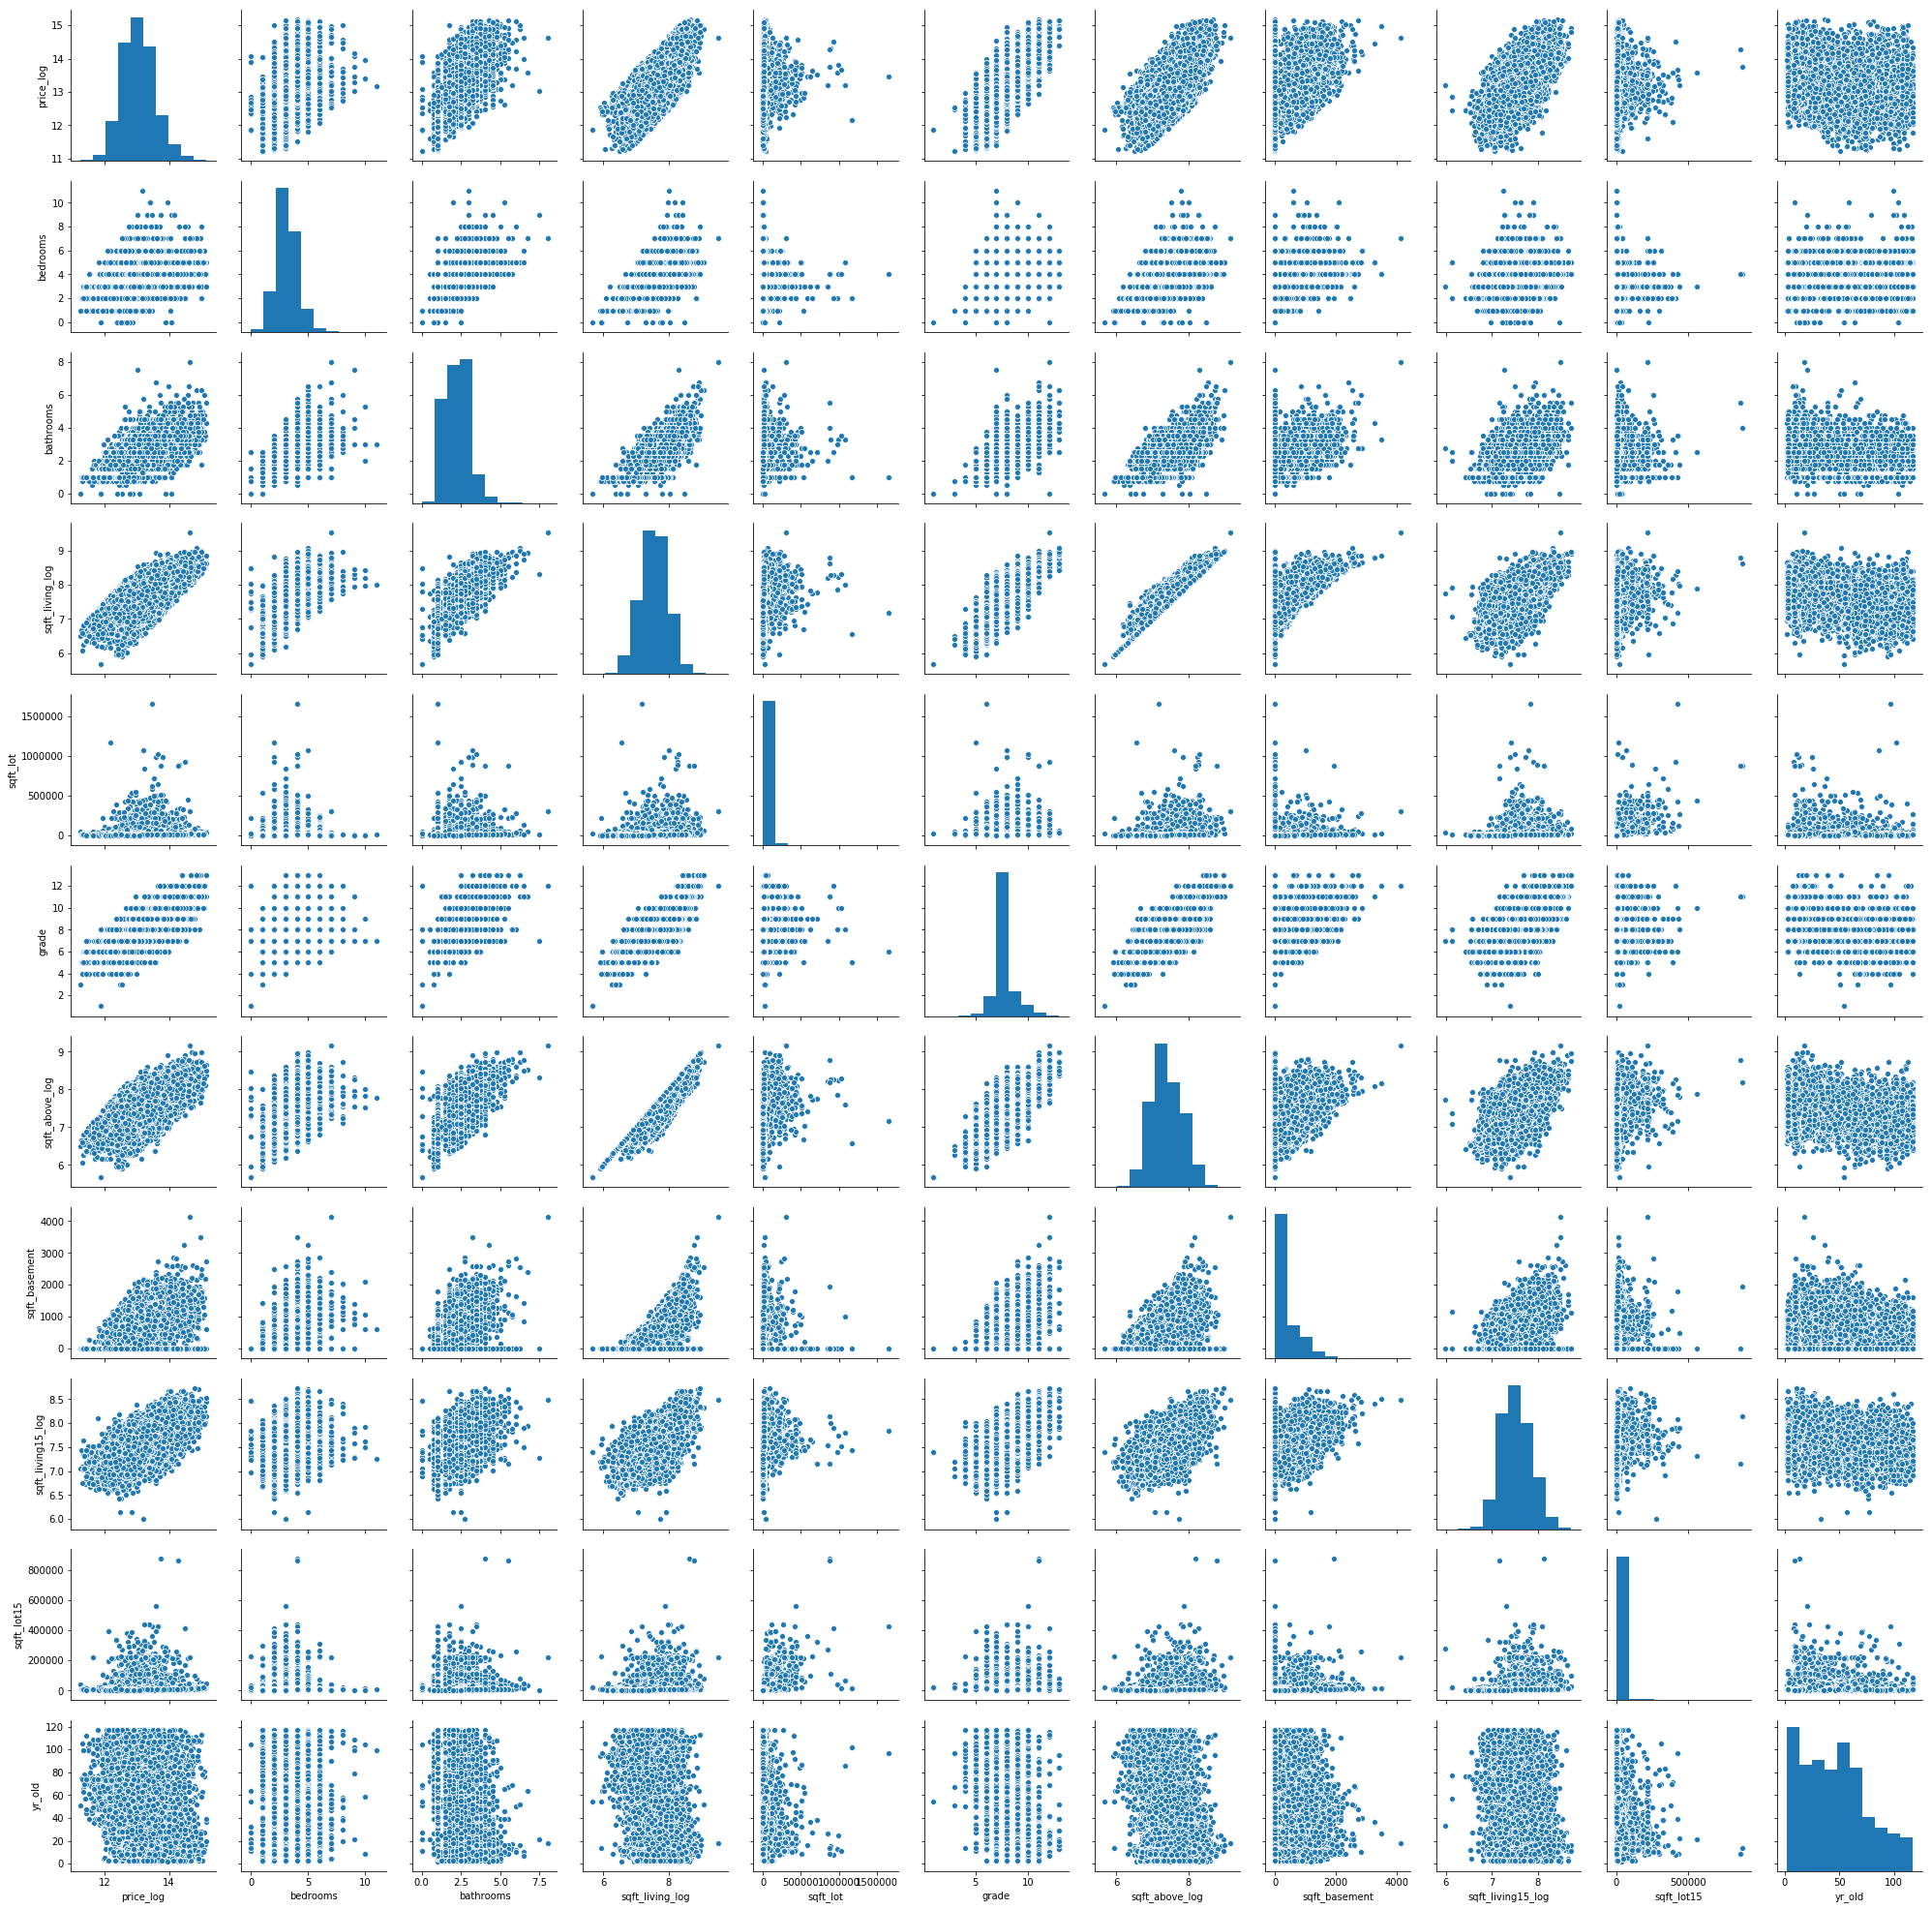

In [57]:
sns.pairplot(kc_df, vars=cols)

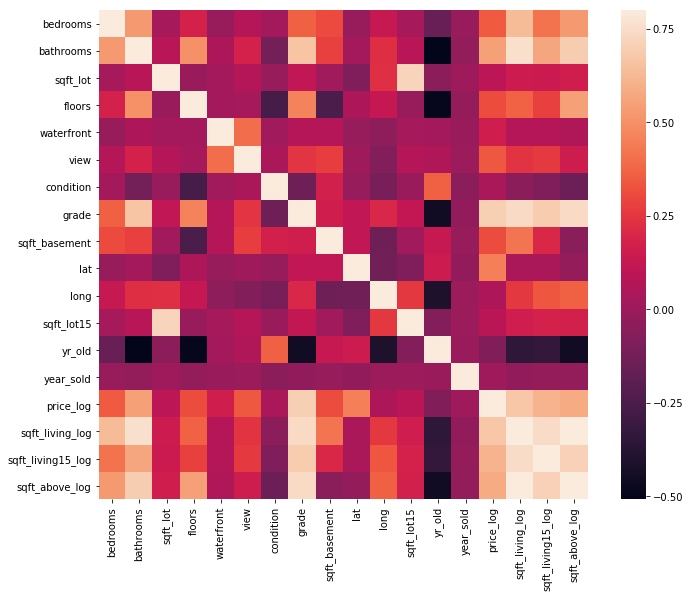

In [69]:
corrmat = kc_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

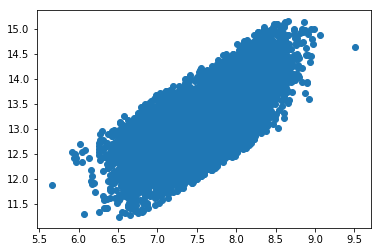

In [11]:
plt.scatter(kc_df['sqft_living_log'], kc_df['price_log']);

In [12]:
target = kc_df['price_log']
features = kc_df[feature_col]

In [13]:
#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=105, test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (17280, 17) Target:  (17280,)
Training set - Features:  (4320, 17) Target:  (4320,)


In [14]:
#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

coeff = list(lm.coef_)
coef_df = pd.DataFrame([feature_col, coeff]).T
coef_df.columns = ["Features", "Order1_Coefficients"]
print("Order 1 Model intercept: ".format(lm.intercept_))
print ("R^2 Score:", lm.score(X_train, y_train))

Order 1 Model intercept: 
R^2 Score: 0.7687108975845858


In [15]:
coef_df

,Features,Order1_Coefficients
0,bedrooms,-0.0256376
1,bathrooms,0.0707143
2,sqft_lot,4.71286e-07
3,floors,0.0704917
4,waterfront,0.393122
5,view,0.0577383
6,condition,0.0607221
7,grade,0.164046
8,sqft_basement,6.3181e-05
9,lat,1.3607


In [26]:
poly = PolynomialFeatures(2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)

#check the shape of the results
print("Training set - Features: ", X_poly_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_poly_test.shape, "Target: ",y_test.shape)

Training set - Features:  (17280, 171) Target:  (17280,)
Training set - Features:  (4320, 171) Target:  (4320,)


In [36]:
poly_2 = linear_model.LinearRegression().fit(X_poly_train, y_train)

print("Order 2 Model intercept: {}".format(poly_2.intercept_))
print ("R^2 Score:", poly_2.score(X_poly_test, y_test))

Order 2 Model intercept: 6599.785591820459
R^2 Score: 0.8107159533932263


In [28]:
poly_3 = PolynomialFeatures(3)
X_poly3_train = poly_3.fit_transform(X_train)
X_poly3_test = poly_3.fit_transform(X_test)

#check the shape of the results
print("Training set - Features: ", X_poly3_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_poly3_test.shape, "Target: ",y_test.shape)

Training set - Features:  (17280, 1140) Target:  (17280,)
Training set - Features:  (4320, 1140) Target:  (4320,)


In [29]:
reg_poly_3 = linear_model.LinearRegression().fit(X_poly3_train, y_train)

print("Order 3 Model intercept: {}".format(reg_poly_3.intercept_))
print ("R^2 Score:", reg_poly_3.score(X_poly3_test, y_test))

Order 3 Model intercept: -35.49065486583787
R^2 Score: 0.38016901055528163


In [41]:
scalar_2 = StandardScaler()

scalar_2.fit(X_poly_train)
X_train_2_scaled  = scalar_2.transform(X_poly_train)
X_test_2_scaled = scalar_2.transform(X_poly_test)

In [70]:
lassoReg01 = Lasso(alpha=0.01, normalize=True)

lassoReg01.fit(X_train_2_scaled, y_train)
y_pred_lasso01 = lassoReg01.predict(X_test_2_scaled)
print('Root Mean Squared Error:' + str(np.exp(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso01)))))
print(np.exp(y_pred_lasso01))

Root Mean Squared Error:1.7010993308857705
[462381.45149503 462381.45149503 462381.45149503 ... 462381.45149503
 462381.45149503 462381.45149503]
